In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('TF version', tf.__version__)
print('GPU detected', tf.config.list_physical_devices('GPU'))

TF version 2.2.0
GPU detected []


In [24]:
from google.colab import files
uploaded = files.upload()

Saving ner_dataset.csv to ner_dataset (1).csv


In [25]:
import io
data = pd.read_csv(io.BytesIO(uploaded['ner_dataset.csv']), encoding = 'latin1')
data = data.fillna(method = 'ffill')
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [0]:
words = list(set(data['Word'].values))
words.append("ENDPAD")
tags = list(set(data['Tag'].values))
num_words = len(words)
num_tags = len(tags)

In [34]:
num_words, num_tags

(35179, 17)

Retrive Sentences and their orresponding Tags

In [0]:
class SentenceGetter(object):
  def __init__(self, data):
    self.data = data
    agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                       s["POS"].values.tolist(),
                                                       s["Tag"].values.tolist())]
    self.grouped = self.data.groupby("Sentence #").apply(agg_func)
    self.sentences = [s for s in self.grouped]

In [0]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [36]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [0]:
# Define a mapping between Sentences and Tags
words2idx = {w: i+1 for i, w in enumerate(words)}
tags2idx = {t: i for i, t in enumerate(tags)}

In [42]:
words2idx

{'subzero': 1,
 'eject': 2,
 'Merk': 3,
 'aggravated': 4,
 'opportunities': 5,
 'recapitalization': 6,
 'Ernest': 7,
 'notifying': 8,
 'counter-coup': 9,
 'Beyazit': 10,
 'Legislature': 11,
 'ration': 12,
 'shelling': 13,
 'Hyderabad': 14,
 'Chretien': 15,
 'Framework': 16,
 'fourth-busiest': 17,
 'revitalizing': 18,
 'thereof': 19,
 'blows': 20,
 'Bond': 21,
 '5,64,000': 22,
 'Francisco': 23,
 'Azimi': 24,
 'room': 25,
 'authenticated': 26,
 'unsuccessful': 27,
 'Phnom': 28,
 'Dumarsais': 29,
 'locals': 30,
 'capabilities': 31,
 'Holder': 32,
 'Chairperson': 33,
 'pre-tax': 34,
 'bigger': 35,
 'managers': 36,
 'hardship': 37,
 'was': 38,
 'consuming': 39,
 'pounce': 40,
 'assaulted': 41,
 'surgery': 42,
 'problem': 43,
 'Laurent': 44,
 'shouted': 45,
 'Bad': 46,
 'violence-ridden': 47,
 'Germaine': 48,
 'States': 49,
 'II': 50,
 'Union-Latin': 51,
 'Gotovina': 52,
 'Midwestern': 53,
 'lasting': 54,
 'morale-boosting': 55,
 'Giuseppe': 56,
 '1,40,000': 57,
 'pastor': 58,
 'Famine': 59,

In [0]:
# For Keras and TF input all are required to be of the same length. So we need to make each sentence into the same length.

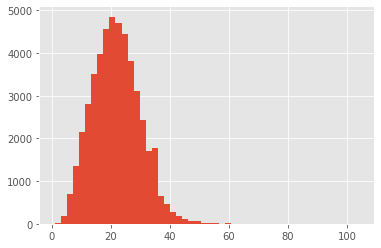

In [41]:
plt.hist([len(s) for s in sentences], bins = 50)
plt.show()

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len = 50
# index of each word in each sentences obtained from the dict created previously
X = [[words2idx[w[0]] for w in s] for s in sentences]

In [49]:
X[0]

[13912,
 33320,
 5856,
 4282,
 15175,
 27398,
 17800,
 21457,
 20877,
 11441,
 6741,
 4169,
 1705,
 34177,
 18391,
 11441,
 18230,
 33320,
 26448,
 8188,
 14098,
 33198,
 25444,
 15156]

In [0]:
X = pad_sequences(maxlen = max_len, sequences = X, padding = 'post', value = num_words-1)

In [0]:
y = [[tags2idx[w[2]] for w in s] for s in sentences]

In [55]:
y[0]

[13,
 13,
 13,
 13,
 13,
 13,
 0,
 13,
 13,
 13,
 13,
 13,
 0,
 13,
 13,
 13,
 13,
 13,
 4,
 13,
 13,
 13,
 13,
 13]

In [0]:
y = pad_sequences(maxlen = max_len, sequences = y, padding = 'post', value = tags2idx["O"])
y = [to_categorical(i, num_classes=num_tags) for i in y]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [0]:
# Building a Bidirectional LSTM
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [65]:
input_word = Input(shape = (max_len, ))
model = Embedding(input_dim = num_words, output_dim = max_len, input_length = max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units = 100, return_sequences = True, recurrent_dropout = 0.1))(model)
out = TimeDistributed(Dense(num_tags, activation = 'softmax'))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 50)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 200)           120800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
# Training the Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from livelossplot.tf_keras import PlotLossesCallback

In [80]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 10, verbose = 0, mode = 'max', restore_best_weights = False)
# callbacks = [PlotLossesCallback(), early_stopping]
history = model.fit(x_train, np.array(y_train), validation_split = 0.2, batch_size = 64, epochs = 50, verbose = 1)

Epoch 1/50
540/540 [==============================] - 144s 266ms/step - loss: 0.0801 - accuracy: 0.9778 - val_loss: 0.0618 - val_accuracy: 0.9821
Epoch 2/50
540/540 [==============================] - 134s 249ms/step - loss: 0.0487 - accuracy: 0.9859 - val_loss: 0.0520 - val_accuracy: 0.9845
Epoch 3/50
540/540 [==============================] - 134s 247ms/step - loss: 0.0383 - accuracy: 0.9885 - val_loss: 0.0492 - val_accuracy: 0.9851
Epoch 4/50
540/540 [==============================] - 134s 249ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0499 - val_accuracy: 0.9852
Epoch 5/50
540/540 [==============================] - 135s 250ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0504 - val_accuracy: 0.9853
Epoch 6/50
540/540 [==============================] - 134s 248ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0518 - val_accuracy: 0.9856
Epoch 7/50
540/540 [==============================] - 132s 244ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0536 -

In [125]:
# Evaluate Named Entity Regcognition Model
model.evaluate(x_test, np.array(y_test))

150/150 [==============================] - 3s 22ms/step - loss: 0.1298 - accuracy: 0.9829


[0.12976178526878357, 0.9828565716743469]

In [181]:
i = np.random.randint(0, x_test.shape[0])
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis = -1)

y_true = np.argmax(np.array(y_test), axis = -1)[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-"*30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
  print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Word           True 	 Pred

------------------------------
Japan          B-geo	B-geo
's             B-org	B-org
Foreign        I-org	B-org
Ministry       I-org	I-org
says           O	O
Russian        B-gpe	B-gpe
authorities    O	O
have           O	O
seized         O	O
four           O	O
Japanese       B-gpe	B-gpe
fishing        O	O
boats          O	O
in             O	O
disputed       O	O
waters         O	O
off            O	O
Russia         B-geo	B-geo
's             O	O
far            O	O
east           O	O
on             O	O
suspicion      O	O
of             O	O
illegal        O	O
fishing        O	O
.              O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk       

In [157]:
i = np.random.randint(0, x_test.shape[0])
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis = -1)

y_true = np.argmax(np.array(y_test), axis = -1)[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-"*30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
  print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Word           True 	 Pred

------------------------------
He             O	O
will           O	O
travel         O	O
to             O	O
El             B-geo	B-geo
Salvador       I-geo	I-geo
,              O	O
Honduras       B-geo	B-geo
and            O	O
Guatemala      B-geo	B-geo
from           O	O
June           B-tim	B-tim
3              I-tim	I-tim
through        I-tim	I-tim
June           I-tim	I-tim
6              I-tim	I-tim
.              O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk          

In [202]:
i = np.random.randint(0, x_test.shape[0])
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis = -1)

y_true = np.argmax(np.array(y_test), axis = -1)[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-"*30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
  print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Word           True 	 Pred

------------------------------
The            O	O
U.N.           B-org	B-org
Security       I-org	I-org
Council        I-org	I-org
has            O	O
canceled       O	O
plans          O	O
to             O	O
send           O	O
a              O	O
delegation     O	O
to             O	O
talks          O	O
with           O	O
the            O	O
Sudanese       B-gpe	B-gpe
government     O	O
and            O	O
the            O	O
African        B-geo	B-geo
Union          I-geo	I-org
on             O	O
the            O	O
crisis         O	O
in             O	O
Darfur         B-geo	B-geo
.              O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk           O	O
folk       